## ANALYSIS QUESTIONS

* Are addiction levels higher in certain locations? - 
* Is there a relationship between scroll rate and engagement level? 
* Is there a relationship between profession and device type?
* Does the type of device impact productivity loss?




In [284]:
# Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem
import os
from pathlib import Path
import requests
import json
#install pkg: pip install kagglehub
import kagglehub
from scipy.stats import linregress, pearsonr, ttest_ind, shapiro, levene
import scipy.stats as st
import seaborn as sns


In [3]:
#kaggle login
kagglehub.login() 

In [223]:
# # Download latest version
path = kagglehub.dataset_download("muhammadroshaanriaz/time-wasters-on-social-media")
print("Path to dataset files:", path)
# orig_dataset_df = pd.DataFrame(path)
# orig_dataset_df
# df = pd.read_csv(path)
# kagglehub.dataset_download('muhammadroshaanriaz/time-wasters-on-social-media', force_download=True)




Path to dataset files: /Users/Angelina/.cache/kagglehub/datasets/muhammadroshaanriaz/time-wasters-on-social-media/versions/1


In [224]:
#Path to dataset file: '/Users/Angelina/.cache/kagglehub/datasets/muhammadroshaanriaz/time-wasters-on-social-media/versions/1'
#File to load - paste path from above into file_to_load 
file_to_load = Path("/Users/Angelina/.cache/kagglehub/datasets/muhammadroshaanriaz/time-wasters-on-social-media/versions/1/Time-Wasters on Social Media.csv")
#file_to_load = os.path.join(".", "data", "user_behavior_dataset.csv") 


#Read data
mobile_usage_df = pd.read_csv(file_to_load)

mobile_usage_df


,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,22,Male,India,74254,True,True,Students,Rural,TikTok,...,9,1,Procrastination,Smartphone,iOS,5:45 PM,10,0,At work,Mobile Data
996,997,40,Female,Pakistan,27006,False,False,Waiting staff,Urban,Facebook,...,8,2,Boredom,Smartphone,MacOS,10:15 PM,10,0,At home,Mobile Data
997,998,27,Male,India,94218,True,True,Waiting staff,Rural,TikTok,...,9,1,Procrastination,Smartphone,iOS,10:15 PM,10,0,Commuting,Mobile Data
998,999,61,Male,Pakistan,85344,True,False,Students,Urban,YouTube,...,3,7,Procrastination,Smartphone,MacOS,10:15 PM,5,5,At work,Wi-Fi


In [225]:
# Get info about total rows and columns
num_rows, num_columns = mobile_usage_df.shape

print(f"Total number of rows is: {num_rows}")
print(f"Total number of columns is: {num_columns}")

Total number of rows is: 1000
Total number of columns is: 31


In [226]:
# Get info about data
mobile_usage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   object
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   object
 14  Video Length             

In [227]:
# Check for any null values
mobile_usage_df.isna().sum()

UserID                      0
Age                         0
Gender                      0
Location                    0
Income                      0
Debt                        0
Owns Property               0
Profession                  0
Demographics                0
Platform                    0
Total Time Spent            0
Number of Sessions          0
Video ID                    0
Video Category              0
Video Length                0
Engagement                  0
Importance Score            0
Time Spent On Video         0
Number of Videos Watched    0
Scroll Rate                 0
Frequency                   0
ProductivityLoss            0
Satisfaction                0
Watch Reason                0
DeviceType                  0
OS                          0
Watch Time                  0
Self Control                0
Addiction Level             0
CurrentActivity             0
ConnectionType              0
dtype: int64

In [228]:
# Check for any duplicates
mobile_usage_df[mobile_usage_df.duplicated()]

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType


In [229]:
# Fetch random rows
mobile_usage_df.sample(5)

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
282,283,53,Male,Mexico,76526,True,True,Teacher,Rural,YouTube,...,6,4,Procrastination,Computer,iOS,3:45 PM,8,2,At home,Mobile Data
806,807,21,Female,Mexico,91121,True,True,Engineer,Rural,TikTok,...,8,2,Entertainment,Tablet,Android,5:00 PM,10,0,Commuting,Mobile Data
142,143,32,Female,Pakistan,43648,False,True,Engineer,Rural,Instagram,...,6,4,Habit,Smartphone,Android,2:00 PM,8,2,At school,Mobile Data
965,966,19,Male,India,67832,True,True,Students,Rural,YouTube,...,3,7,Entertainment,Smartphone,iOS,10:15 PM,5,5,Commuting,Mobile Data
634,635,27,Male,Philippines,83922,True,True,Labor/Worker,Rural,TikTok,...,4,6,Entertainment,Smartphone,Android,5:45 PM,6,4,At home,Mobile Data


In [230]:
#rename Barzil to Brazil in Location column and replace driver to Drive in the Profession column
mobile_usage_df["Location"] = mobile_usage_df["Location"].replace("Barzil", "Brazil")
mobile_usage_df["Profession"] = mobile_usage_df["Profession"].replace("driver", "Driver")
mobile_usage_df["Profession"] = mobile_usage_df["Profession"].replace("Waiting staff", "Waiting Staff")

In [231]:
#display columns
mobile_usage_df.columns

Index(['UserID', 'Age', 'Gender', 'Location', 'Income', 'Debt',
       'Owns Property', 'Profession', 'Demographics', 'Platform',
       'Total Time Spent', 'Number of Sessions', 'Video ID', 'Video Category',
       'Video Length', 'Engagement', 'Importance Score', 'Time Spent On Video',
       'Number of Videos Watched', 'Scroll Rate', 'Frequency',
       'ProductivityLoss', 'Satisfaction', 'Watch Reason', 'DeviceType', 'OS',
       'Watch Time', 'Self Control', 'Addiction Level', 'CurrentActivity',
       'ConnectionType'],
      dtype='object')

In [232]:
#rename columns "CurrentActivity" and "ConnectionType"
mobile_usage_df = mobile_usage_df.rename(columns={
    "DeviceType": "Device Type",
    "CurrentActivity": "Current Activity",
    "ConnectionType": "Connection Type"
})

In [233]:
#display columns
mobile_usage_df.columns

Index(['UserID', 'Age', 'Gender', 'Location', 'Income', 'Debt',
       'Owns Property', 'Profession', 'Demographics', 'Platform',
       'Total Time Spent', 'Number of Sessions', 'Video ID', 'Video Category',
       'Video Length', 'Engagement', 'Importance Score', 'Time Spent On Video',
       'Number of Videos Watched', 'Scroll Rate', 'Frequency',
       'ProductivityLoss', 'Satisfaction', 'Watch Reason', 'Device Type', 'OS',
       'Watch Time', 'Self Control', 'Addiction Level', 'Current Activity',
       'Connection Type'],
      dtype='object')

In [234]:
mobile_usage_df.to_csv("data/Cleaned_dataset.csv", index=False)
print(mobile_usage_df)

     UserID  Age  Gender       Location  Income   Debt  Owns Property  \
0         1   56    Male       Pakistan   82812   True           True   
1         2   46  Female         Mexico   27999  False           True   
2         3   32  Female  United States   42436  False           True   
3         4   60    Male         Brazil   62963   True          False   
4         5   25    Male       Pakistan   22096  False           True   
..      ...  ...     ...            ...     ...    ...            ...   
995     996   22    Male          India   74254   True           True   
996     997   40  Female       Pakistan   27006  False          False   
997     998   27    Male          India   94218   True           True   
998     999   61    Male       Pakistan   85344   True          False   
999    1000   19    Male          India   53840   True           True   

        Profession Demographics   Platform  ...  ProductivityLoss  \
0         Engineer        Rural  Instagram  ...       

In [235]:
#file to load
cleaned_dataset_path = Path("data/Cleaned_dataset.csv")

#read the file 
cleaned_dataset_df = pd.read_csv(cleaned_dataset_path, index_col=False)
cleaned_dataset_df

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,Device Type,OS,Watch Time,Self Control,Addiction Level,Current Activity,Connection Type
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Brazil,62963,True,False,Waiting Staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,22,Male,India,74254,True,True,Students,Rural,TikTok,...,9,1,Procrastination,Smartphone,iOS,5:45 PM,10,0,At work,Mobile Data
996,997,40,Female,Pakistan,27006,False,False,Waiting Staff,Urban,Facebook,...,8,2,Boredom,Smartphone,MacOS,10:15 PM,10,0,At home,Mobile Data
997,998,27,Male,India,94218,True,True,Waiting Staff,Rural,TikTok,...,9,1,Procrastination,Smartphone,iOS,10:15 PM,10,0,Commuting,Mobile Data
998,999,61,Male,Pakistan,85344,True,False,Students,Urban,YouTube,...,3,7,Procrastination,Smartphone,MacOS,10:15 PM,5,5,At work,Wi-Fi


In [236]:
# Get info about total rows and columns
num_rows, num_columns = cleaned_dataset_df.shape

print(f"Total number of rows is: {num_rows}")
print(f"Total number of columns is: {num_columns}")

Total number of rows is: 1000
Total number of columns is: 31


In [237]:
cleaned_dataset_df.dtypes

UserID                       int64
Age                          int64
Gender                      object
Location                    object
Income                       int64
Debt                          bool
Owns Property                 bool
Profession                  object
Demographics                object
Platform                    object
Total Time Spent             int64
Number of Sessions           int64
Video ID                     int64
Video Category              object
Video Length                 int64
Engagement                   int64
Importance Score             int64
Time Spent On Video          int64
Number of Videos Watched     int64
Scroll Rate                  int64
Frequency                   object
ProductivityLoss             int64
Satisfaction                 int64
Watch Reason                object
Device Type                 object
OS                          object
Watch Time                  object
Self Control                 int64
Addiction Level     

In [238]:
cleaned_dataset_df.describe()

,UserID,Age,Income,Total Time Spent,Number of Sessions,Video ID,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,ProductivityLoss,Satisfaction,Self Control,Addiction Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.986000,59524.213000,151.406000,10.013000,4891.738000,15.214000,4997.159000,5.129000,14.973000,25.248000,49.774000,5.136000,4.864000,7.094000,2.906000
std,288.819436,13.497852,23736.212925,83.952637,5.380314,2853.144258,8.224953,2910.053701,2.582834,8.200092,14.029159,29.197798,2.122265,2.122265,2.058495,2.058495
min,1.000000,18.000000,20138.000000,10.000000,1.000000,11.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,250.750000,29.000000,38675.250000,78.000000,6.000000,2542.000000,8.000000,2415.750000,3.000000,8.000000,14.000000,23.000000,3.000000,4.000000,5.000000,2.000000
50%,500.500000,42.000000,58805.000000,152.000000,10.000000,4720.500000,15.000000,5016.000000,5.000000,15.000000,25.000000,50.000000,5.000000,5.000000,7.000000,3.000000
75%,750.250000,52.000000,79792.250000,223.000000,15.000000,7346.000000,22.000000,7540.250000,7.000000,22.000000,37.000000,74.000000,6.000000,7.000000,8.000000,5.000000
max,1000.000000,64.000000,99676.000000,298.000000,19.000000,9997.000000,29.000000,9982.000000,9.000000,29.000000,49.000000,99.000000,9.000000,9.000000,10.000000,7.000000


In [239]:
#get gender count
gender_count = cleaned_dataset_df["Gender"].value_counts()
gender_count

Gender
Male      514
Female    322
Other     164
Name: count, dtype: int64

In [240]:
#average of addication levels
avg_addication_lvls = cleaned_dataset_df.groupby("Location")["Addiction Level"].mean().round(0)
avg_addication_lvls

Location
Brazil           3.0
Germany          3.0
India            3.0
Indonesia        3.0
Japan            3.0
Mexico           3.0
Pakistan         3.0
Philippines      3.0
United States    3.0
Vietnam          3.0
Name: Addiction Level, dtype: float64

In [241]:
#Are addiction levels higher in certain locations?

location_count = cleaned_dataset_df["Location"].value_counts()
location_count

Location
India            228
United States    174
Vietnam           82
Brazil            78
Philippines       78
Indonesia         77
Pakistan          76
Japan             75
Mexico            73
Germany           59
Name: count, dtype: int64

In [242]:
##########Are addiction levels higher in certain locations?

addiction_lvl_df = cleaned_dataset_df[["Location","Addiction Level"]]
addiction_lvl_df

,Location,Addiction Level
0,Pakistan,5
1,Mexico,3
2,United States,2
3,Brazil,5
4,Pakistan,0
...,...,...
995,India,0
996,Pakistan,0
997,India,0
998,Pakistan,5


In [243]:
##########Are addiction levels higher in certain locations?

#create bar plot to show count of locations
location_count_df  = pd.DataFrame(location_count).reset_index()
location_count_df

,Location,count
0,India,228
1,United States,174
2,Vietnam,82
3,Brazil,78
4,Philippines,78
5,Indonesia,77
6,Pakistan,76
7,Japan,75
8,Mexico,73
9,Germany,59


In [244]:
##########Are addiction levels higher in certain locations?

# Group by Addiction Level only and calculate the total count across all locations
addiction_level_counts = cleaned_dataset_df.groupby("Addiction Level").size()

# Display the result
addiction_level_counts

Addiction Level
0    180
1     60
2    248
3    159
4     36
5    228
6     34
7     55
dtype: int64

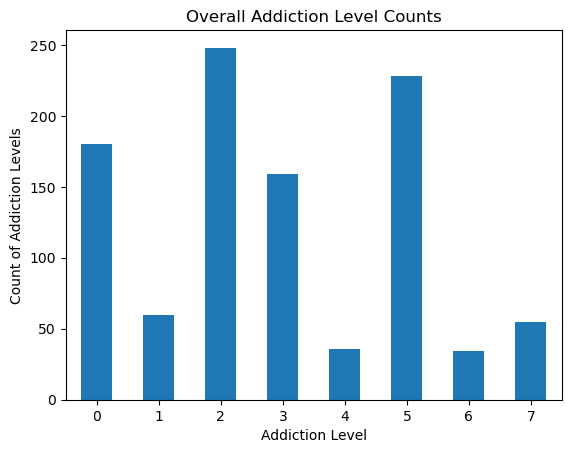

In [245]:
##########Are addiction levels higher in certain locations?
#addiction overall count

# Plot the counts of each addiction level
addiction_level_counts.plot(kind="bar")
plt.title("Overall Addiction Level Counts")
plt.xlabel("Addiction Level")
plt.ylabel("Count of Addiction Levels")
plt.xticks(rotation=0) 
plt.show()

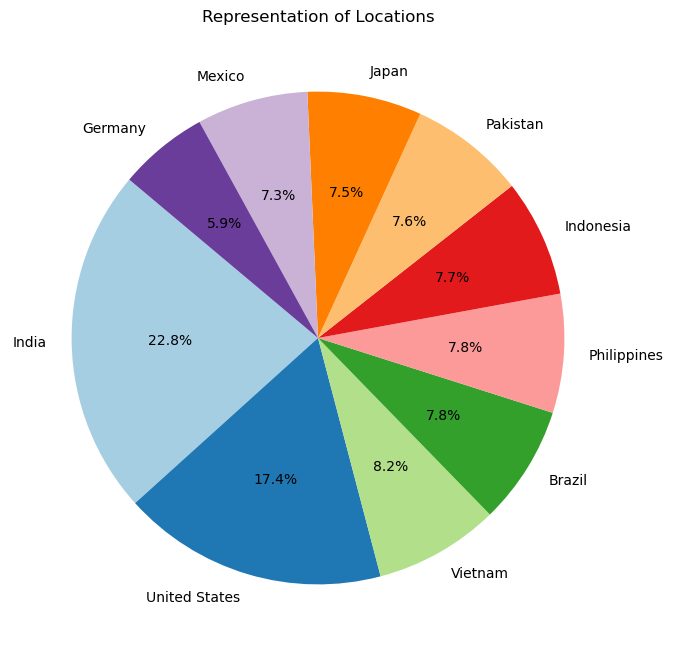

In [246]:
##############---USED
# Count the number of participants in each location
##########Are addiction levels higher in certain locations?
location_counts = cleaned_dataset_df['Location'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Representation of Locations")
plt.show()

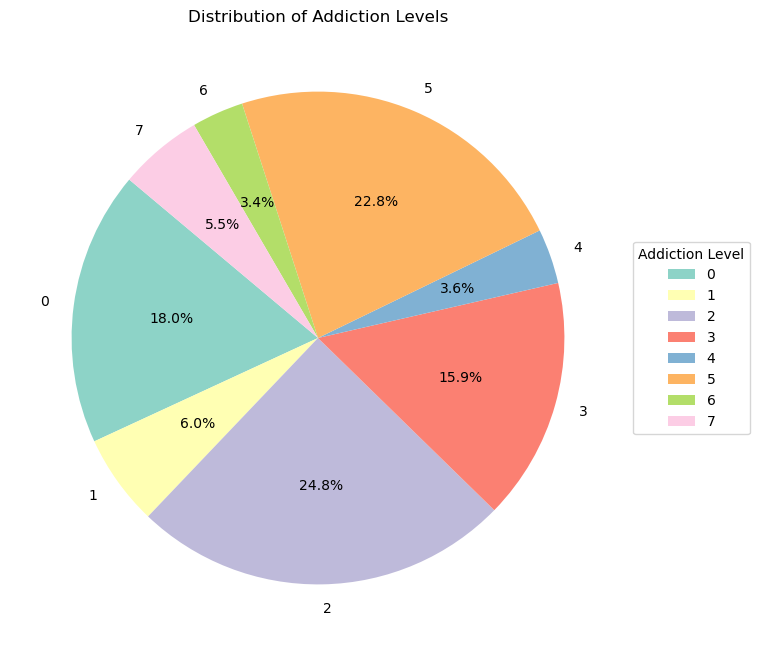

In [247]:
##########Are addiction levels higher in certain locations?
#addiction overall count


# Convert addiction_level_totals to an array for plt.pie compatibility
values = addiction_level_counts.values  # Get the values as an array
labels = addiction_level_counts.index  # Get the labels from the index

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
# Add the legend
plt.legend(
    title="Addiction Level",
    bbox_to_anchor=(1, 0.5),  # Positioning the legend outside the pie chart on the right
    loc="center left"
)

# Add a title
plt.title("Distribution of Addiction Levels")
plt.show()

In [248]:
##########Are addiction levels higher in certain locations?
#addiction level by location 

#group cleaned_dataset_df by "Location", "Addiction Level", .size() counts the number of "Addiction Level" instances in each "Location", .unstack() changes Series to DataFrame where "Addiction Level" is columns and "Location" is rows, fill_value=0) replaces Null values with 0
#addiction_lvl_location = cleaned_dataset_df.groupby(["Addiction Level", "Location"]).size().unstack
addiction_lvl_location = cleaned_dataset_df.groupby(["Location", "Addiction Level"]).size().unstack(fill_value=0)
addiction_lvl_location

Addiction Level,0,1,2,3,4,5,6,7
Location,,,,,,,,
Brazil,6,3,16,17,2,29,3,2
Germany,12,2,8,13,2,15,4,3
India,34,17,60,37,10,50,9,11
Indonesia,17,3,22,8,2,18,4,3
Japan,14,9,24,7,0,16,2,3
Mexico,15,4,17,10,3,16,3,5
Pakistan,19,3,18,11,5,19,0,1
Philippines,12,3,24,15,1,14,3,6
United States,29,12,43,27,8,34,4,17


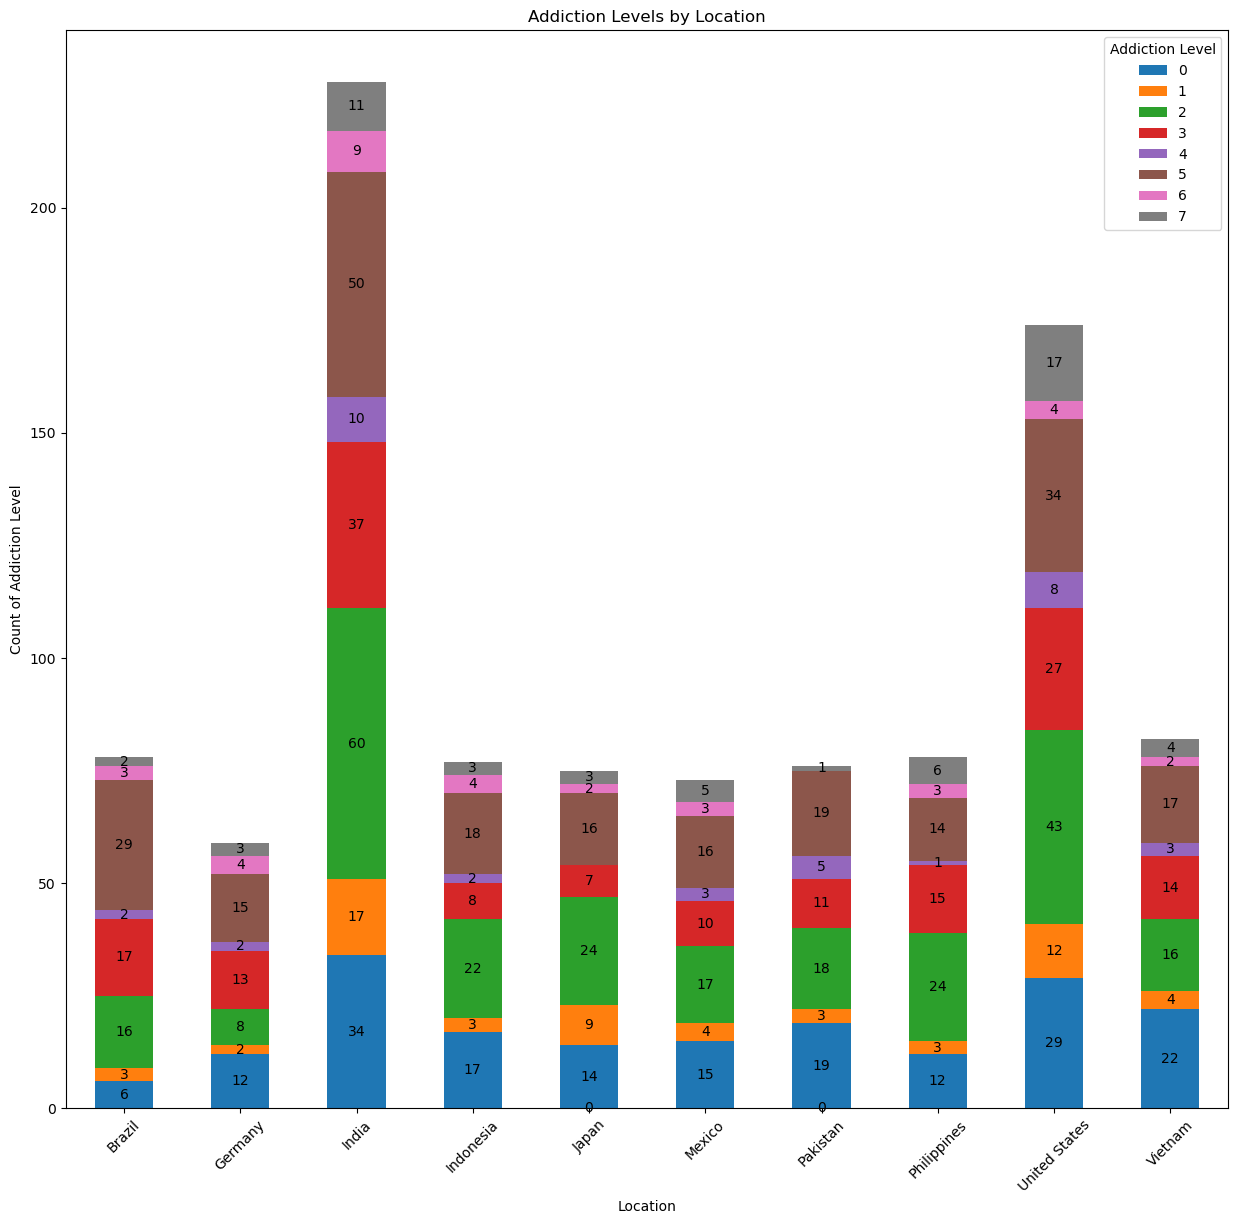

In [249]:
##########Are addiction levels higher in certain locations?
#addiction level by location 

# #create stacked bar chart
# addiction_lvl_location.plot(kind="bar", stacked=True, figsize=(15, 6))
# plt.ylabel("Count of Addiction Level")
# plt.title("Addiction Levels by Location")
# plt.show()

#create stacked bar chart
ax = addiction_lvl_location.plot(kind="bar", stacked=True, figsize=(15, 14))
plt.ylabel("Count of Addiction Level")
plt.xticks(rotation=45) 
plt.title("Addiction Levels by Location")

#add values on top of each category in the bar chart
for container in ax.containers:
    #add the labels for each segment of the bar
    ax.bar_label(container, label_type="center", fmt='%.0f')  # Center the labels within each section

plt.show()

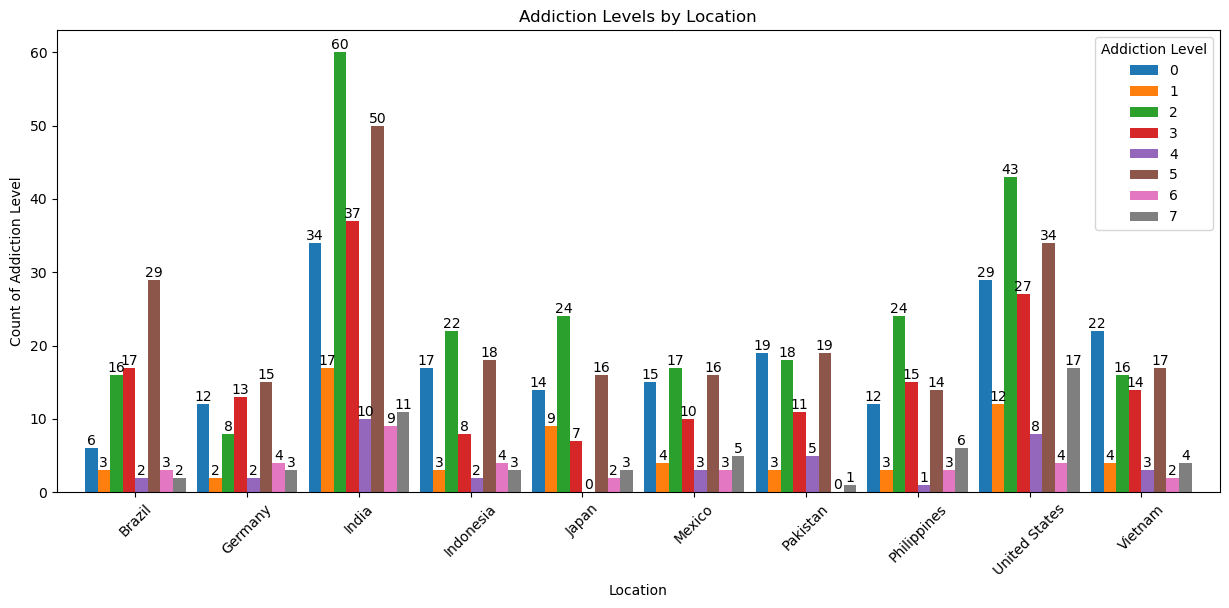

In [250]:
##########Are addiction levels higher in certain locations?
#addiction level by location 

# Create bar chart and store the plot in ax
ax = addiction_lvl_location.plot(kind="bar", figsize=(15, 6), width=0.9)
plt.title("Addiction Levels by Location")
plt.xlabel("Location")
plt.ylabel("Count of Addiction Level")
plt.xticks(rotation=45) 
plt.legend(title="Addiction Level")

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type="edge", fmt='%.0f')  # '%.0f' format for integer values

plt.show()

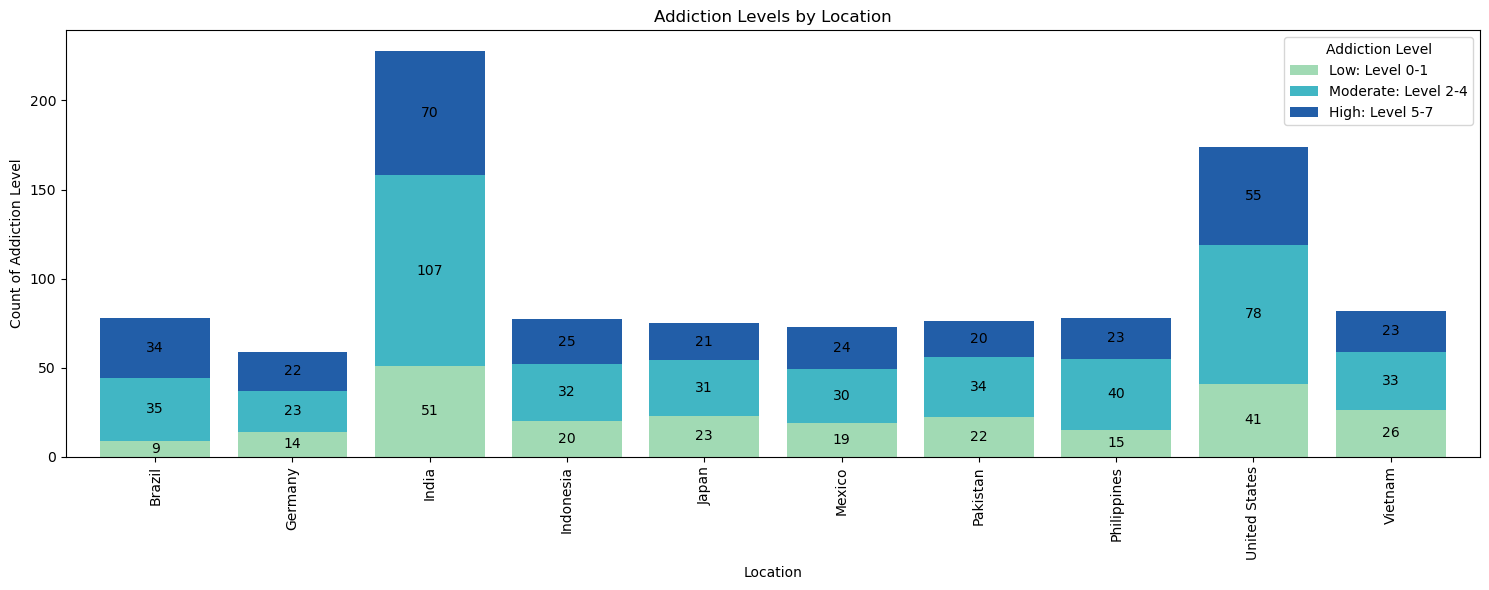

In [281]:
##############---USED
##########Are addiction levels higher in certain locations?

#define the new categories
low_levels = addiction_lvl_location[[0, 1]].sum(axis=1)
moderate_levels = addiction_lvl_location[[2, 3, 4]].sum(axis=1)
high_levels = addiction_lvl_location[[5, 6, 7]].sum(axis=1)

#create a new DataFrame with the grouped levels
grouped_addiction_df = pd.DataFrame({
    'Low: Level 0-1': low_levels,
    'Moderate: Level 2-4': moderate_levels,
    'High: Level 5-7': high_levels
})

#plot the data as a stacked bar chart
ax = grouped_addiction_df.plot(kind="bar", stacked=True, color=['#a1dab4', '#41b6c4', '#225ea8'], width=0.8, figsize=(15, 6))

# Add labels and title
plt.ylabel("Count of Addiction Level")
plt.xlabel("Location")
plt.title("Addiction Levels by Location")
plt.xticks(rotation=90)
plt.legend(title="Addiction Level")

#add values on top of each category in the bar chart
for container in ax.containers:
    #add the labels for each segment of the bar
    ax.bar_label(container, label_type="center", fmt='%.0f')  # Center the labels within each section

#show the plot
plt.tight_layout()
plt.show()

In [252]:
grouped_addiction_df

,Low: Level 0-1,Moderate: Level 2-4,High: Level 5-7
Location,,,
Brazil,9,35,34
Germany,14,23,22
India,51,107,70
Indonesia,20,32,25
Japan,23,31,21
Mexico,19,30,24
Pakistan,22,34,20
Philippines,15,40,23
United States,41,78,55


In [253]:
##########Are addiction levels higher in certain locations?
#addiction level by location 

#group cleaned_dataset_df by "Addiction Level", "Location", .size() counts the number of "Location" instances in each "Addiction Level", .unstack() changes Series to DataFrame where "Addiction Level" is columns and "Location" is rows, fill_value=0) replaces Null values with 0
addiction_lvl = cleaned_dataset_df.groupby(["Addiction Level", "Location"]).size().unstack(fill_value=0)
addiction_lvl

Location,Brazil,Germany,India,Indonesia,Japan,Mexico,Pakistan,Philippines,United States,Vietnam
Addiction Level,,,,,,,,,,
0,6,12,34,17,14,15,19,12,29,22
1,3,2,17,3,9,4,3,3,12,4
2,16,8,60,22,24,17,18,24,43,16
3,17,13,37,8,7,10,11,15,27,14
4,2,2,10,2,0,3,5,1,8,3
5,29,15,50,18,16,16,19,14,34,17
6,3,4,9,4,2,3,0,3,4,2
7,2,3,11,3,3,5,1,6,17,4


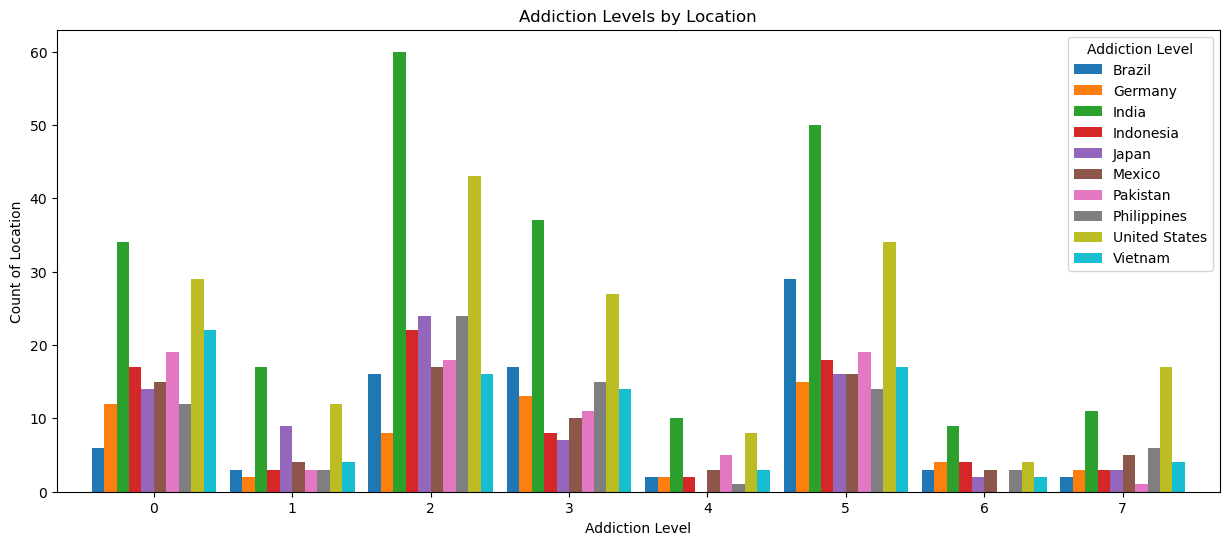

In [254]:
##########Are addiction levels higher in certain locations?
#addiction level by location 

#create bar chart
addiction_lvl.plot(kind="bar", figsize=(15, 6),width=0.9)
plt.title("Addiction Levels by Location")
plt.xlabel("Addiction Level")
plt.ylabel("Count of Location")
plt.xticks(rotation=0) 
plt.legend(title="Addiction Level")
plt.show()

In [255]:
##########Are addiction levels higher in certain locations?
#addiction level vs device type

#group data by "Device Type" and "Addiction Level", and unstack Addiction Level for multi-level columns
addiction_lvl_device_df = cleaned_dataset_df.groupby(["Device Type", "Addiction Level"]).size().unstack(level=1, fill_value=0)
addiction_lvl_device_df

# addiction_lvl_device_html = addiction_lvl_device.to_html(index=False)
# pyperclip.copy(addiction_lvl_device_html)

#copy DataFrame to clipboard as tab-separated text
#addiction_lvl_device_df.to_clipboard(index=False, sep='\t')


Addiction Level,0,1,2,3,4,5,6,7
Device Type,,,,,,,,
Computer,22,6,41,17,4,33,3,6
Smartphone,108,38,149,92,19,137,17,25
Tablet,50,16,58,50,13,58,14,24


In [256]:
##########Are addiction levels higher in certain locations?

#calculate the count of addiction levels by location and device type
addiction_by_device_location = cleaned_dataset_df.groupby(["Location", "Device Type", "Addiction Level"]).size().unstack(fill_value=0)
device_types = cleaned_dataset_df["Device Type"].unique()
addiction_by_device_location

Addiction Level             0   1   2   3  4   5  6  7
Location      Device Type                             
Brazil        Computer      1   1   3   2  0   3  0  0
              Smartphone    3   2  11  12  0  18  2  1
              Tablet        2   0   2   3  2   8  1  1
Germany       Computer      0   0   2   0  0   0  0  0
              Smartphone   10   2   3   7  1   8  1  1
              Tablet        2   0   3   6  1   7  3  2
India         Computer      5   1   7   4  1   6  2  0
              Smartphone   22  12  42  20  5  30  5  5
              Tablet        7   4  11  13  4  14  2  6
Indonesia     Computer      3   0   7   2  0   6  1  0
              Smartphone    7   2   7   5  1  10  1  1
              Tablet        7   1   8   1  1   2  2  2
Japan         Computer      1   1   2   0  0   2  0  1
              Smartphone   10   8  16   6  0   8  1  1
              Tablet        3   0   6   1  0   6  1  1
Mexico        Computer      2   1   4   1  1   3  0  1
              Smartphone    8   1  10   5  2  10  2  1
              Tablet        5   2   3   4  0   3  1  3
Pakistan      Computer      0   0   4   2  0   4  0  0
              Smartphone   12   0  13   5  4  11  0  1
              Tablet        7   3   1   4  1   4  0  0
Philippines   Computer      3   0   3   2  0   2  0  0
              Smartphone    4   2  15   9  1  11  1  5
              Tablet        5   1   6   4  0   1  2  1
United States Computer      5   2   4   0  2   6  0  4
              Smartphone   20   7  26  18  3  22  3  6
              Tablet        4   3  13   9  3   6  1  7
Vietnam       Computer      2   0   5   4  0   1  0  0
              Smartphone   12   2   6   5  2   9  1  3
              Tablet        8   2   5   5  1   7  1  1

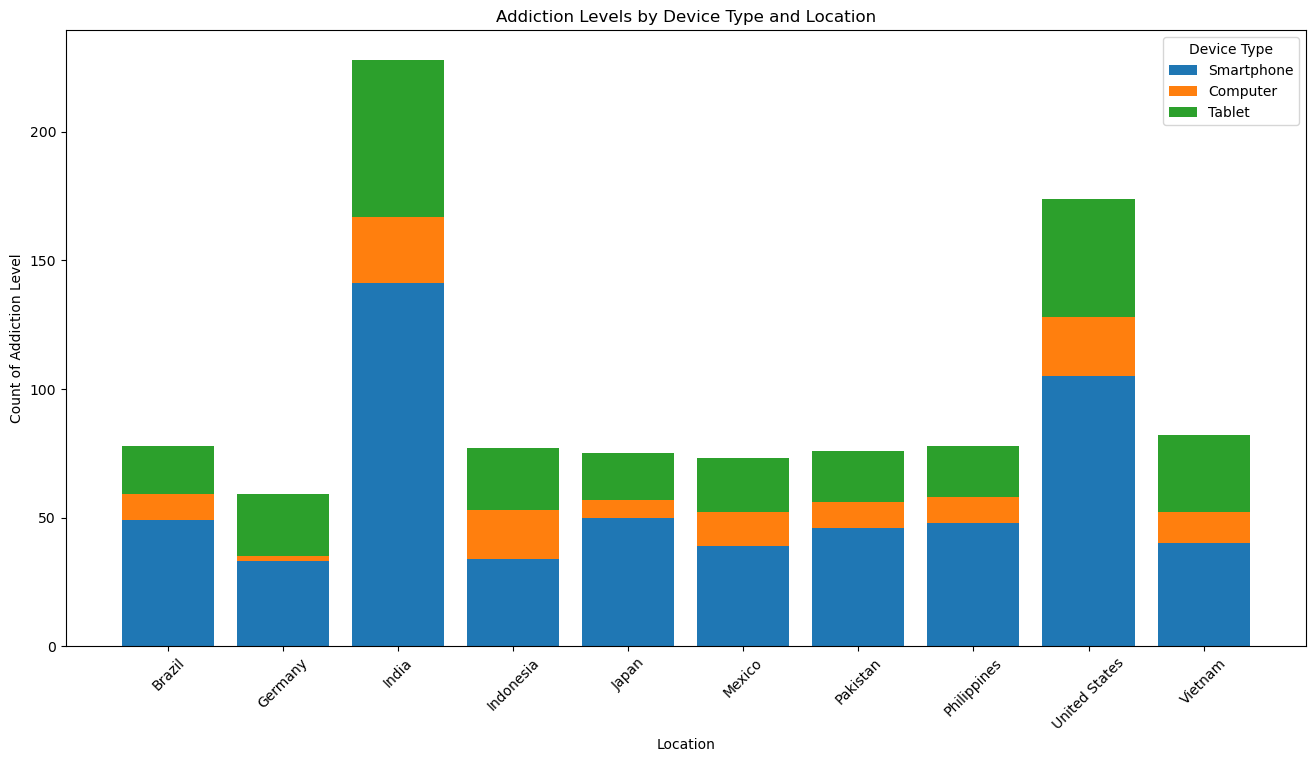

In [257]:
##########Are addiction levels higher in certain locations?

#reset the index to make 'Location' a column
addiction_by_device_location = addiction_by_device_location.reset_index()

#create the stacked bar chart
fig, ax = plt.subplots(figsize=(16, 8))

#initialize the bottom array for stacking bars
bottom = np.zeros(len(addiction_by_device_location["Location"].unique()))

#loop through each device type and add a stack for each addiction level
for device_type in device_types:
    #filter data for the current device type, select only numeric columns for summing counts by location
    counts = addiction_by_device_location[addiction_by_device_location["Device Type"] == device_type].set_index("Location").select_dtypes(include="number").sum(axis=1)
    ax.bar(counts.index, counts.values, label=device_type, bottom=bottom)
    #update bottom for stacking
    bottom += counts.values  

#add labels and title
ax.set_title("Addiction Levels by Device Type and Location")
ax.set_xlabel("Location")
ax.set_ylabel("Count of Addiction Level")
plt.xticks(rotation=45)
ax.legend(title="Device Type")
plt.show()

In [258]:
##########Are addiction levels higher in certain locations?

#group by Location, Profession, and Addiction Level, and get the count for each combination
addiction_by_location_profession = cleaned_dataset_df.groupby(["Location", "Profession", "Addiction Level"]).size().unstack(fill_value=0)
addiction_by_location_profession

Addiction Level         0  1  2  3  4  5  6  7
Location Profession                           
Brazil   Artist         1  0  0  2  0  2  0  0
         Cashier        0  0  1  1  0  2  1  0
         Driver         0  0  2  4  1  2  0  0
         Engineer       0  1  0  3  0  2  0  0
         Labor/Worker   3  0  3  1  1  9  0  1
...                    .. .. .. .. .. .. .. ..
Vietnam  Labor/Worker   4  1  3  4  1  2  1  0
         Manager        2  0  2  1  1  2  0  0
         Students       8  0  4  5  1  0  0  2
         Teacher        0  1  0  0  0  1  0  0
         Waiting Staff  4  1  3  3  0  4  0  1

[90 rows x 8 columns]

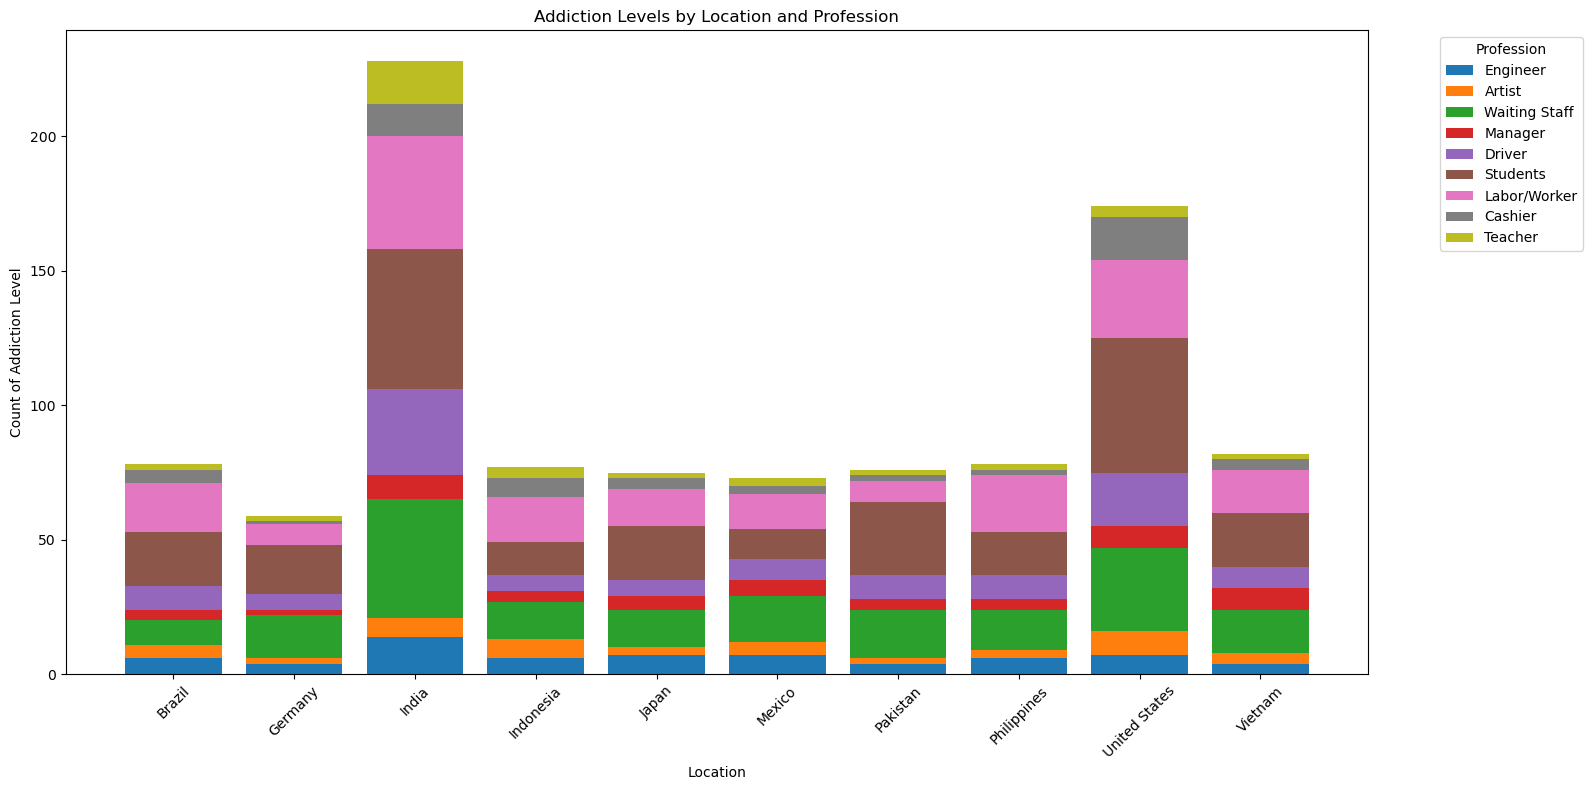

In [259]:
##########Are addiction levels higher in certain locations?

#reset the index to make 'Location' and 'Profession' columns
addiction_by_location_profession = addiction_by_location_profession.reset_index()

#list of unique locations and professions for the loop
locations = cleaned_dataset_df["Location"].unique()
professions = cleaned_dataset_df["Profession"].unique()

#create the stacked bar chart for each location, grouped by profession
fig, ax = plt.subplots(figsize=(16, 8))

#initialize the bottom array for stacking bars
bottom = np.zeros(len(addiction_by_location_profession["Location"].unique()))

#loop through each profession and add a stack for each addiction level
for profession in professions:
    #filter data for the current profession and sum counts by location
    counts = addiction_by_location_profession[addiction_by_location_profession["Profession"] == profession].set_index("Location").select_dtypes(include="number").sum(axis=1)
    ax.bar(counts.index, counts.values, label=profession, bottom=bottom)
    #update bottom for stacking
    bottom += counts.values  

#ad labels and title
ax.set_title("Addiction Levels by Location and Profession")
ax.set_xlabel("Location")
ax.set_ylabel("Count of Addiction Level")
plt.xticks(rotation=45)
ax.legend(title="Profession", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

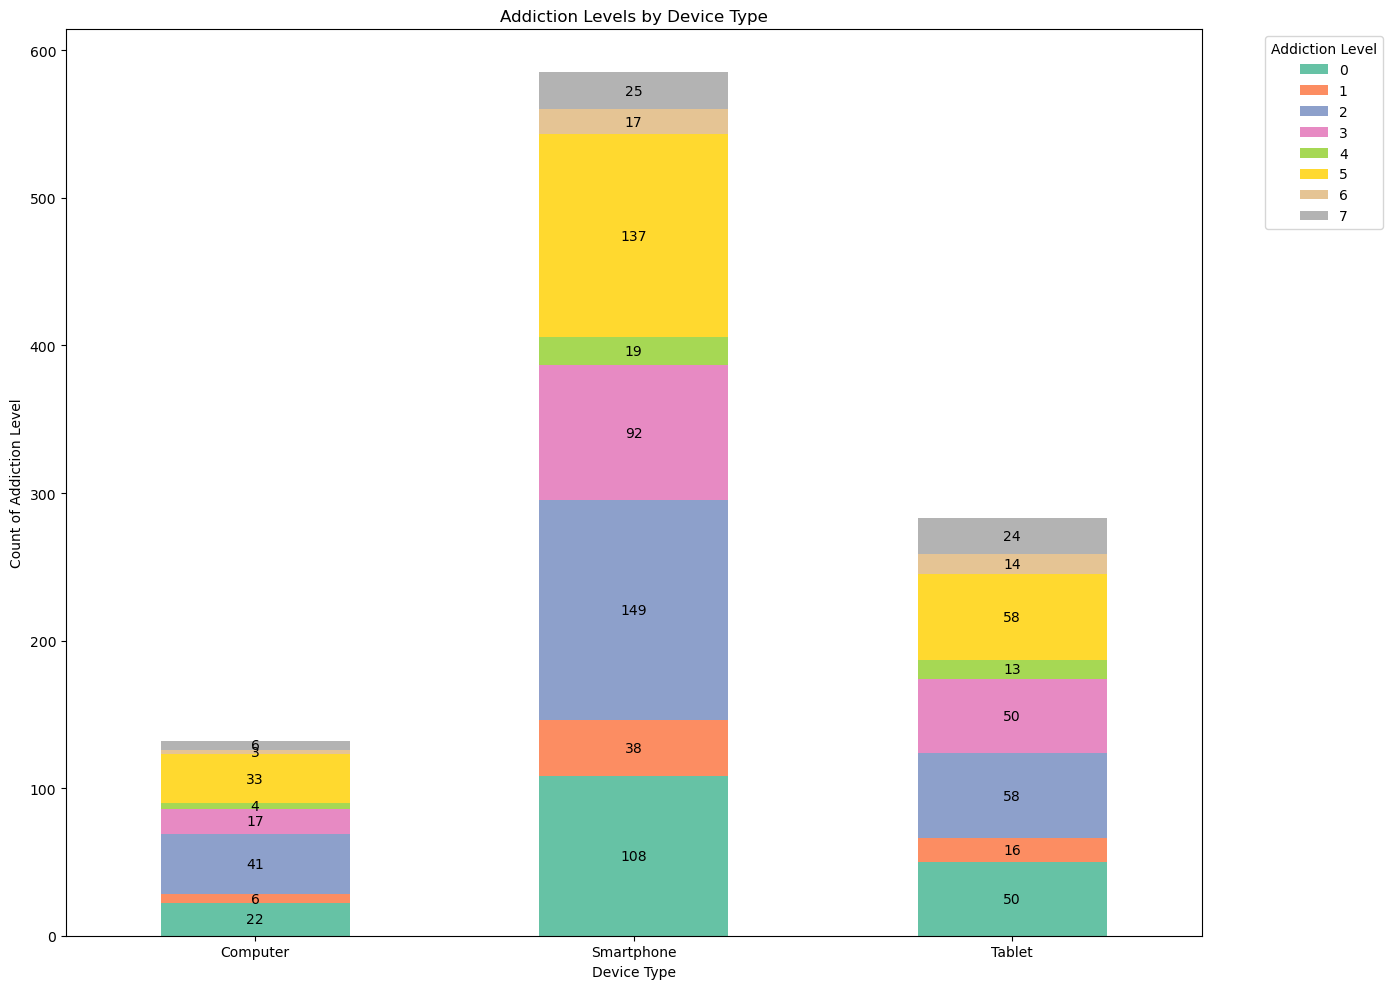

In [260]:
##########Are addiction levels higher in certain locations?
#addiction level by device type

# Set up the plot
#plt.figure(figsize=(18, 14))
ax = addiction_lvl_device_df.plot(kind="bar", stacked=True, colormap="Set2", figsize=(14, 10))

# Set labels and title
plt.title("Addiction Levels by Device Type")
plt.xlabel("Device Type")
plt.ylabel("Count of Addiction Level")
plt.xticks(rotation=0)
plt.legend(title="Addiction Level", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add count labels on each stacked segment
for container in ax.containers:
    ax.bar_label(container, label_type="center", fmt='%.0f')  # Add labels in the center of each bar segment

plt.tight_layout()
plt.show()

In [261]:
##########Are addiction levels higher in certain locations?
#addiction level by profession

addiction_lvl_profession_df = cleaned_dataset_df.groupby(["Profession", "Addiction Level"]).size().unstack(level=1, fill_value=0)
addiction_lvl_profession_df


Addiction Level,0,1,2,3,4,5,6,7
Profession,,,,,,,,
Artist,9,4,11,7,1,12,2,1
Cashier,10,3,15,9,4,9,3,3
Driver,17,6,27,19,4,32,4,4
Engineer,12,2,17,10,0,22,2,0
Labor/Worker,32,9,51,28,11,39,8,8
Manager,7,4,13,9,1,17,2,1
Students,42,17,63,31,10,55,6,22
Teacher,8,4,9,5,1,8,0,4
Waiting Staff,43,11,42,41,4,34,7,12


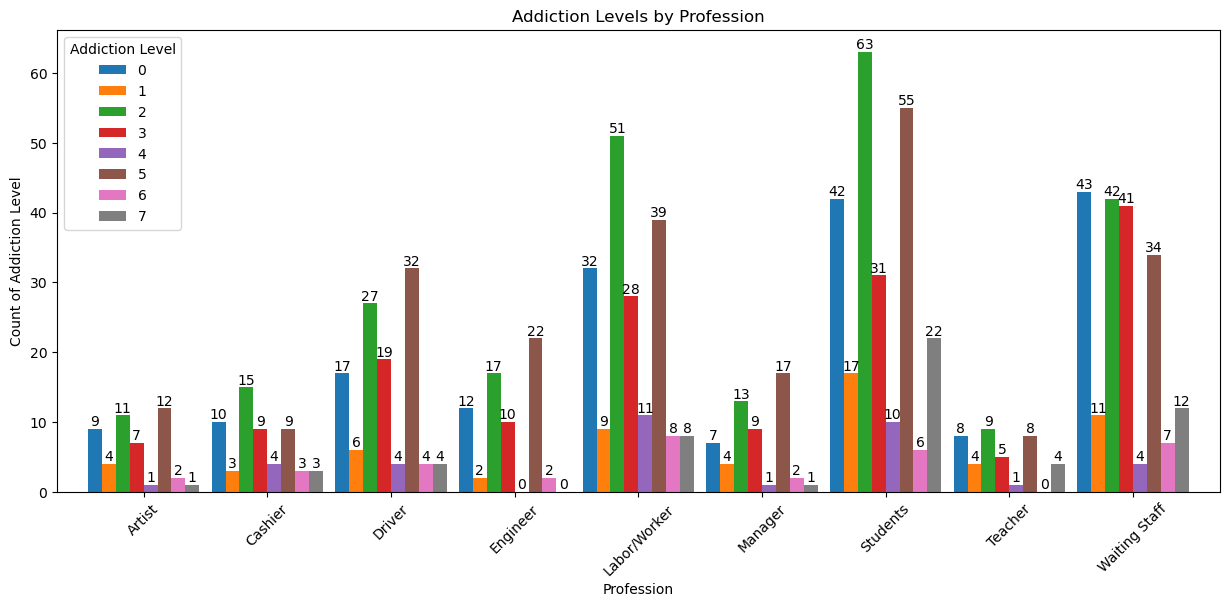

In [262]:
##########Are addiction levels higher in certain locations?
#addiction level by profession

# # Set up the plot
# #plt.figure(figsize=(18, 14))
# ax = addiction_lvl_profession_df.plot(kind="bar", stacked=True, colormap="Set3", figsize=(14, 10))

# # Set labels and title
# plt.title("Addiction Levels by Profession")
# plt.xlabel("Profession")
# plt.ylabel("Count of Addiction Level")
# plt.xticks(rotation=45)
# plt.legend(title="Addiction Level", bbox_to_anchor=(1.05, 1), loc='upper left')

# # Add count labels on each stacked segment
# for container in ax.containers:
#     ax.bar_label(container, label_type="center", fmt='%.0f')  # Add labels in the center of each bar segment

# plt.tight_layout()
# plt.show()


# Create bar chart and store the plot in ax
ax = addiction_lvl_profession_df.plot(kind="bar", figsize=(15, 6), width=0.9)
plt.title("Addiction Levels by Profession")
plt.xlabel("Profession")
plt.ylabel("Count of Addiction Level")
plt.xticks(rotation=45) 
plt.legend(title="Addiction Level")

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type="edge", fmt='%.0f')  # '%.0f' format for integer values

plt.show()

The correlation coefficient between addiction level ands self control is -1.0


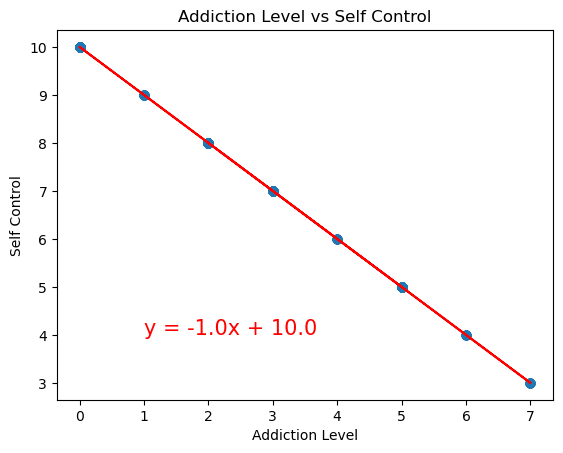

In [263]:
##########Are addiction levels higher in certain locations?
#is there a relationship between addiction level and self control?
#addiction level by self control  

#define x and y values
x_values = cleaned_dataset_df["Addiction Level"] 
y_values = cleaned_dataset_df["Self Control"]
#linear regression using linregress function 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#calculate y values for regression line
regress_values = x_values * slope + intercept

#equation of the regression line as a string
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

#scatter plot 
plt.scatter(x_values,y_values)

#plot x_values and regress_values and the regression line in red
plt.plot(x_values, regress_values, "r-")

#adds the line_eq string as a text annotation to the plot 
plt.annotate(line_eq,(1,4),fontsize=15,color="red")
plt.xlabel("Addiction Level") 
plt.ylabel("Self Control")
plt.title("Addiction Level vs Self Control")
print(f"The correlation coefficient between addiction level ands self control is {round(st.pearsonr(x_values,y_values)[0],2)}")
plt.show()

#define x and y values
# x_values = cleaned_dataset_df["Self Control"] 
# y_values = cleaned_dataset_df["Addiction Level"]
# #linear regression using linregress function 
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# #calculate y values for regression line
# regress_values = x_values * slope + intercept

# #equation of the regression line as a string
# line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# #scatter plot 
# plt.scatter(x_values,y_values)

# #plot x_values and regress_values and the regression line in red
# plt.plot(x_values, regress_values, "r-")

# #adds the line_eq string as a text annotation to the plot 
# plt.annotate(line_eq,(3,1),fontsize=15,color="red")
# plt.xlabel("Self Control") 
# plt.ylabel("Addiction Level")
# plt.title("Self Control vs Addiction Level")
# print(f"The correlation coefficient between self control ands addiction level is {round(st.pearsonr(x_values,y_values)[0],2)}")
# plt.show()



In [264]:
##########Is there a relationship between profession and device type?

profession_count = cleaned_dataset_df["Profession"].value_counts()
profession_count

Profession
Students         246
Waiting Staff    194
Labor/Worker     186
Driver           113
Engineer          65
Cashier           56
Manager           54
Artist            47
Teacher           39
Name: count, dtype: int64

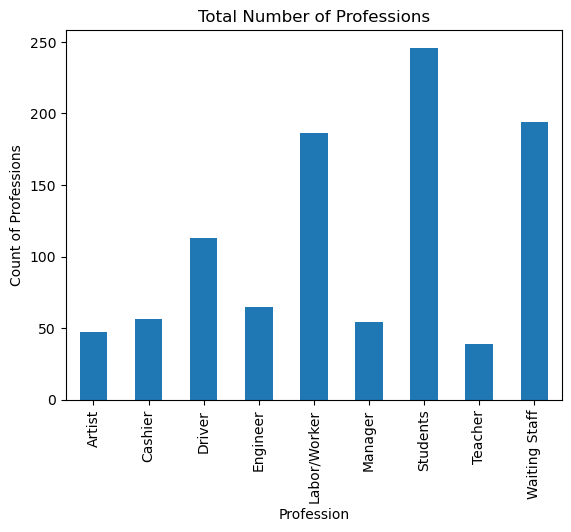

In [265]:
##########Is there a relationship between profession and device type?

#create bar plot to show count of locations
profession_count_df  = pd.DataFrame(profession_count).reset_index()
profession_count_df

profession_count_df = profession_count_df.sort_values(by="Profession")

profession_count_df.columns = ["Profession", "# of Professions"]
profession_count_df
pd_bar_plot = profession_count_df.plot(x="Profession", y="# of Professions", kind="bar", legend=False)
pd_bar_plot.set_ylabel("Count of Professions")
plt.title("Total Number of Professions")
plt.show()

In [266]:
##########Is there a relationship between profession and device type?

device_type_count = cleaned_dataset_df["Device Type"].value_counts()
device_type_count

Device Type
Smartphone    585
Tablet        283
Computer      132
Name: count, dtype: int64

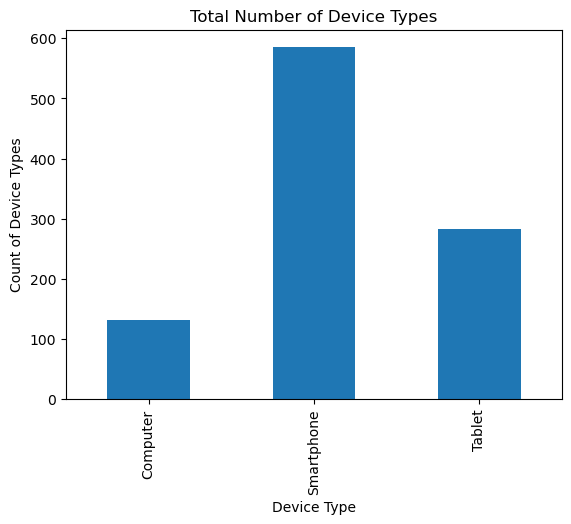

In [267]:
##########Is there a relationship between profession and device type?

#create bar plot to show count of locations
device_type_count_df  = pd.DataFrame(device_type_count).reset_index()
device_type_count_df

device_type_count_df.columns = ["Device Type", "# of Device Types"]
device_type_count_df

device_type_count_df = device_type_count_df.sort_values(by="Device Type")

pd_bar_plot = device_type_count_df.plot(x="Device Type", y="# of Device Types", kind="bar", legend=False)
pd_bar_plot.set_ylabel("Count of Device Types")
plt.title("Total Number of Device Types")
plt.show()

In [268]:
##########Is there a relationship between profession and device type?
#profession by device type

device_type_df = cleaned_dataset_df[["Device Type","Profession"]]
device_type_df

device_profession_counts_df = device_type_df.groupby(["Profession", "Device Type"]).size().unstack()
device_profession_counts_df

Device Type,Computer,Smartphone,Tablet
Profession,,,
Artist,9,25,13
Cashier,15,23,18
Driver,11,70,32
Engineer,10,39,16
Labor/Worker,14,112,60
Manager,8,33,13
Students,34,147,65
Teacher,7,22,10
Waiting Staff,24,114,56


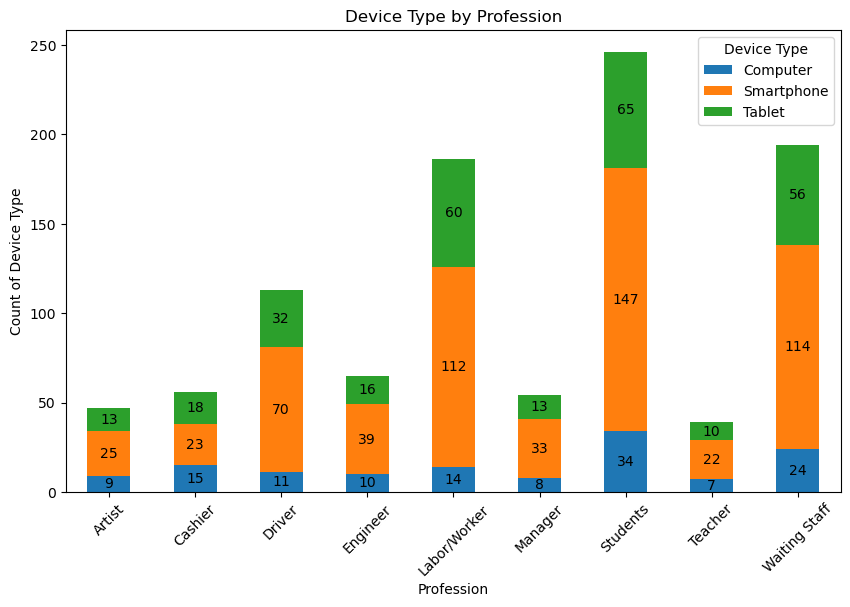

In [282]:
##########Is there a relationship between profession and device type?
#profession by device type


#create stacked bar chart
ax = device_profession_counts_df.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.ylabel("Count of Device Type")
plt.xticks(rotation=45) 
plt.title("Device Type by Profession")

#add values on top of each category in the bar chart
for container in ax.containers:
    #add the labels for each segment of the bar
    ax.bar_label(container, label_type="center", fmt='%.0f')  # Center the labels within each section

plt.show()

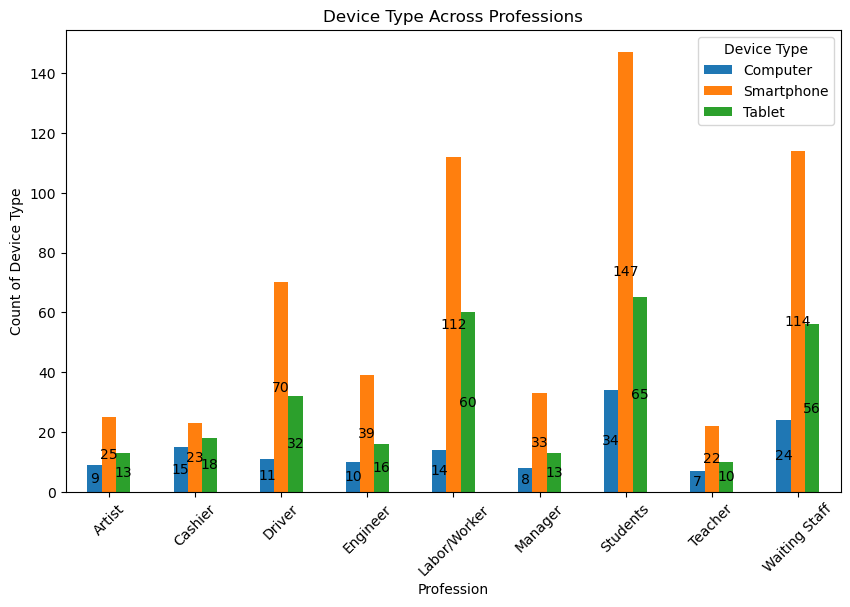

In [270]:
##############---USED
##########Is there a relationship between profession and device type?
#profession by device type

#create bar chart
ax = device_profession_counts_df.plot(kind="bar", figsize=(10, 6))
plt.title("Device Type Across Professions")
plt.xlabel("Profession")
plt.ylabel("Count of Device Type")
plt.xticks(rotation=45) 
plt.legend(title="Device Type")

#add values on top of each category in the bar chart
for container in ax.containers:
    #add the labels for each segment of the bar
    ax.bar_label(container, label_type="center", fmt='%.0f')  # Center the labels within each section

plt.show()

In [271]:
##########Is there a relationship between profession and device type?
#profession and location 

profession_location_df = cleaned_dataset_df.groupby(["Profession", "Location"]).size().unstack(fill_value=0)
profession_location_df

Location,Brazil,Germany,India,Indonesia,Japan,Mexico,Pakistan,Philippines,United States,Vietnam
Profession,,,,,,,,,,
Artist,5,2,7,7,3,5,2,3,9,4
Cashier,5,1,12,7,4,3,2,2,16,4
Driver,9,6,32,6,6,8,9,9,20,8
Engineer,6,4,14,6,7,7,4,6,7,4
Labor/Worker,18,8,42,17,14,13,8,21,29,16
Manager,4,2,9,4,5,6,4,4,8,8
Students,20,18,52,12,20,11,27,16,50,20
Teacher,2,2,16,4,2,3,2,2,4,2
Waiting Staff,9,16,44,14,14,17,18,15,31,16


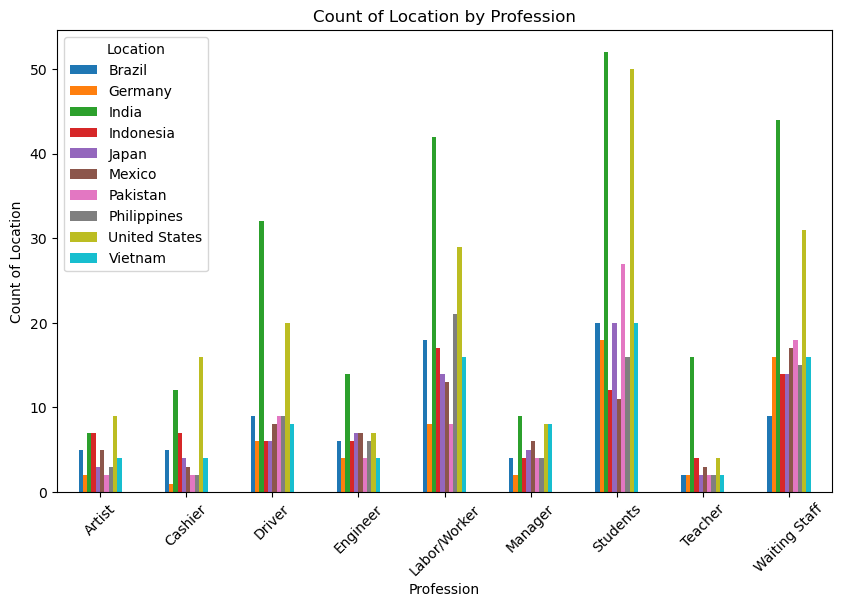

In [272]:
##########Is there a relationship between profession and device type?
#profession and location 

#create bar chart
profession_location_df.plot(kind="bar", figsize=(10, 6))
plt.title("Count of Location by Profession")
plt.xlabel("Profession")
plt.ylabel("Count of Location")
plt.xticks(rotation=45) 
plt.legend(title="Location")
plt.show()


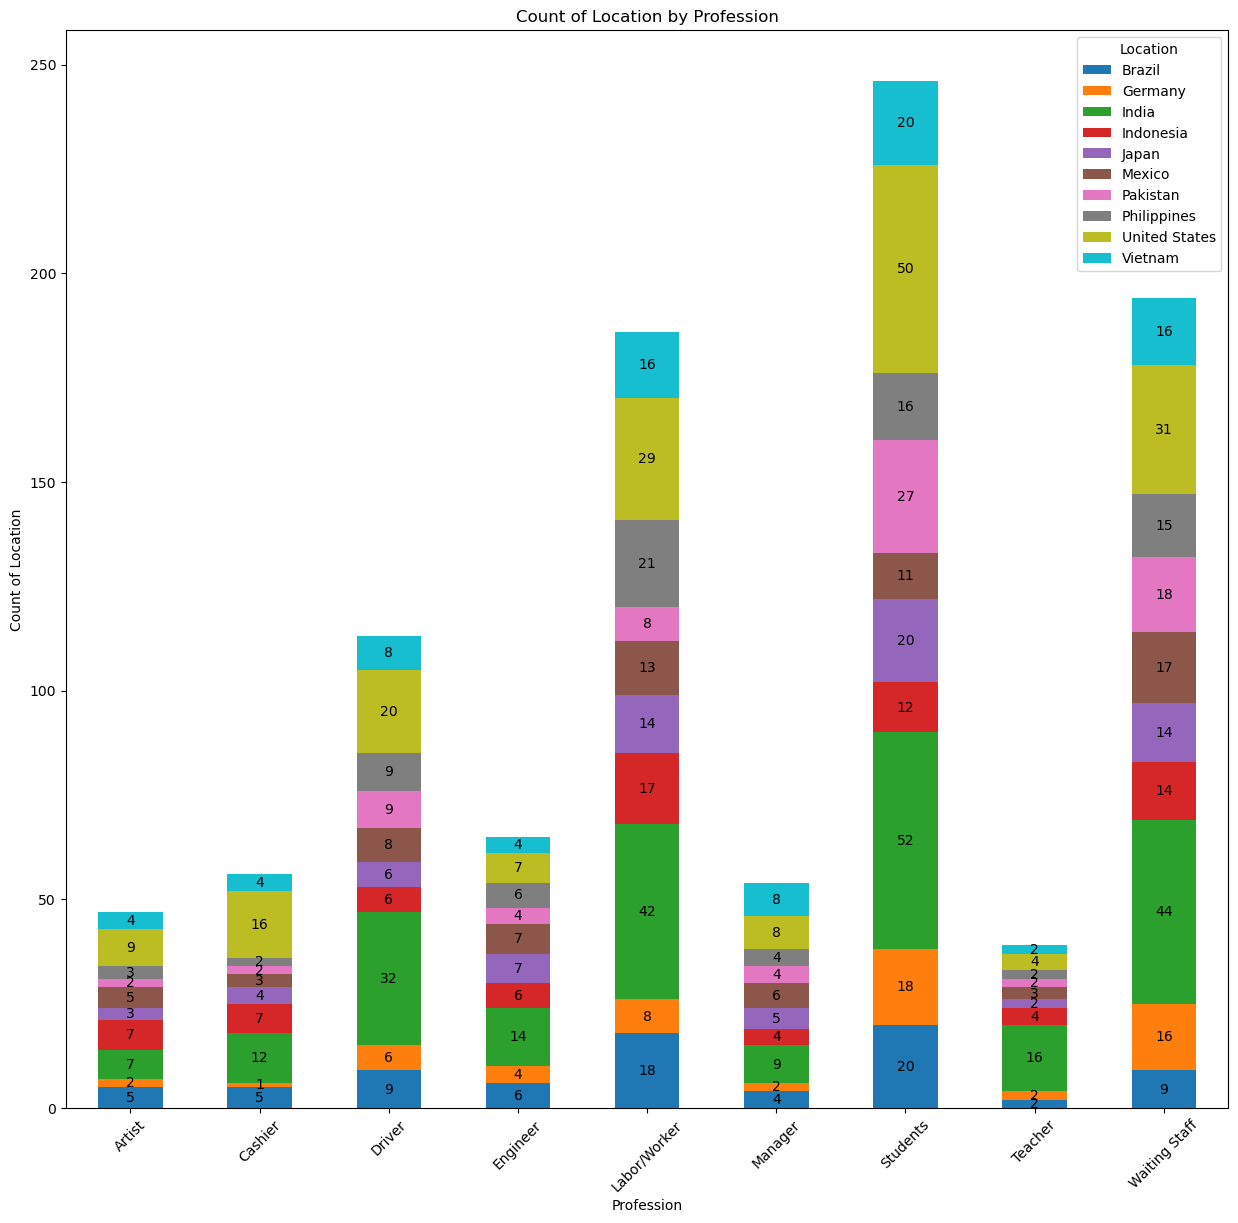

In [273]:
##########Is there a relationship between profession and device type?
#profession and location 

#create stacked bar chart
ax = profession_location_df.plot(kind="bar", stacked=True, figsize=(15, 14))
plt.ylabel("Count of Location")
plt.xticks(rotation=45) 
plt.title("Count of Location by Profession")

#add values on top of each category in the bar chart
for container in ax.containers:
    #add the labels for each segment of the bar
    ax.bar_label(container, label_type="center", fmt='%.0f')  # Center the labels within each section

plt.show()

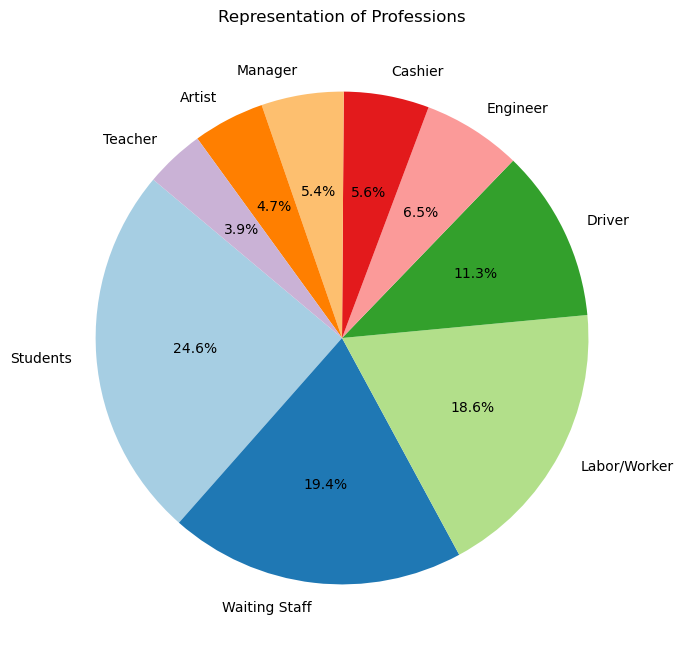

In [274]:
##############---USED
##########Is there a relationship between profession and device type?
#count the number of participants in each profession
profession_counts = cleaned_dataset_df['Profession'].value_counts()

#create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(profession_counts, labels=profession_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Representation of Professions")
plt.show()

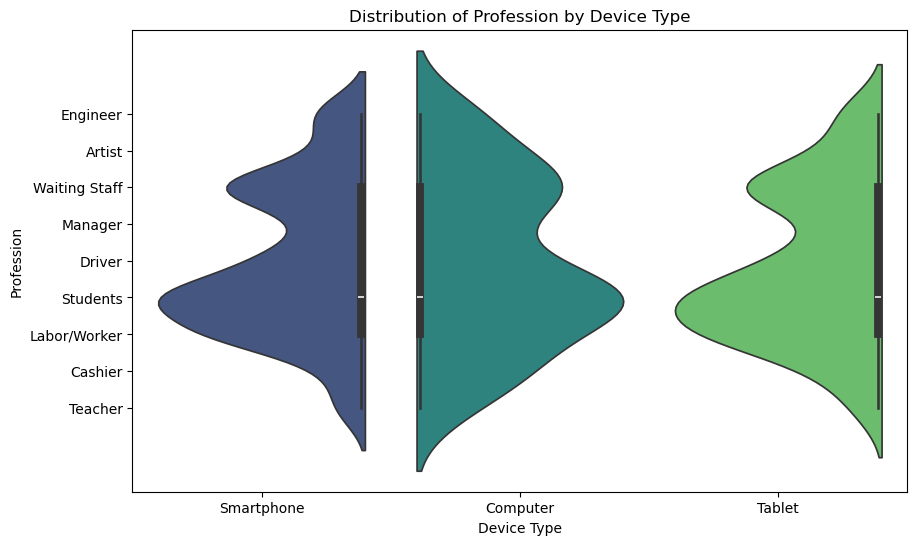

In [296]:
# Creating a violin plot to show the distribution of Productivity Loss by Device Type, with color hues representing Total Time Spent. 
plt.figure(figsize=(10, 6)) 
sns.violinplot( data=cleaned_dataset_df, x='Device Type', y='Profession', hue='Device Type', split=True, palette='viridis') 
plt.xlabel("Device Type") 
plt.ylabel("Profession") 
plt.title("Distribution of Profession by Device Type") 
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()